## Initial ML Models

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_data = pd.read_excel("train_final.xlsx")

train_data.head()

,Unnamed: 0.1,Unnamed: 0,S.No,Comments,Label,transliterated,tokenized_transliteration
0,0,0,HATE_2857,Dr YNM 1 month ago ఇందులో మనం పెద్దగా ఆలోచించా...,non-hate,dr ynm month ago indulo manam peddagaa aalochi...,"['dr', 'ynm', 'month', 'ago', 'indulo', 'manam..."
1,1,1,HATE_2969,lakshmankumar kavali Next Step is tdp vallu mo...,non-hate,lakshmankumar kavali next step is tdp vallu mo...,"['lakshmankumar', 'kavali', 'next', 'step', 'i..."
2,2,2,HATE_1985,​trs party lo telangana kosam poradina valle u...,non-hate,trs party lo telangana kosam poradina valle un...,"['trs', 'party', 'lo', 'telangana', 'kosam', '..."
3,3,3,HATE_2974,అన్నయ్య ప్రింటింగ్ మిషన్ ద్వారా 6093 కోట్ల రూప...,non-hate,annaiah printing mission dwara kotla roopayalu...,"['annaiah', 'printing', 'mission', 'dwara', 'k..."
4,4,4,HATE_2810,ఏముంది పదవికోసం గుధ్ధ కూడా నాకేస్తారు ఈ రాజకీయ...,non-hate,emundi padavikosam guddha kuudaa naakestaaru e...,"['emundi', 'padavikosam', 'guddha', 'kuudaa', ..."


In [6]:
train_data.shape

(3200, 7)

In [7]:
test_data = pd.read_excel("test_final.xlsx")

In [8]:
test_data.shape

(800, 7)

In [2]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data["tokenized_transliteration"])
y_train = train_data["Label"]

In [3]:
def plot_confusion_matrix(y_test, y_pred, num_labels=2):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_labels)],
                yticklabels=[f'Class {i}' for i in range(num_labels)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [4]:
def ml_model_eval(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='hate')
  recall = recall_score(y_test, y_pred,  pos_label='hate')
  f1 = f1_score(y_test, y_pred, pos_label='hate')
  plot_confusion_matrix(y_test,y_pred)
  print("Accuracy:", accuracy)
  print("Precision:",precision)
  print("Recall:",recall)
  print("F1-Score:", f1)

In [5]:
def plot_roc_curve(y_true, y_pred, label=None):

    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label='hate')

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.text(0.6, 0.3, f'AUC = {roc_auc:.2f}')
    plt.show()

### Logistic Regression

In [47]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

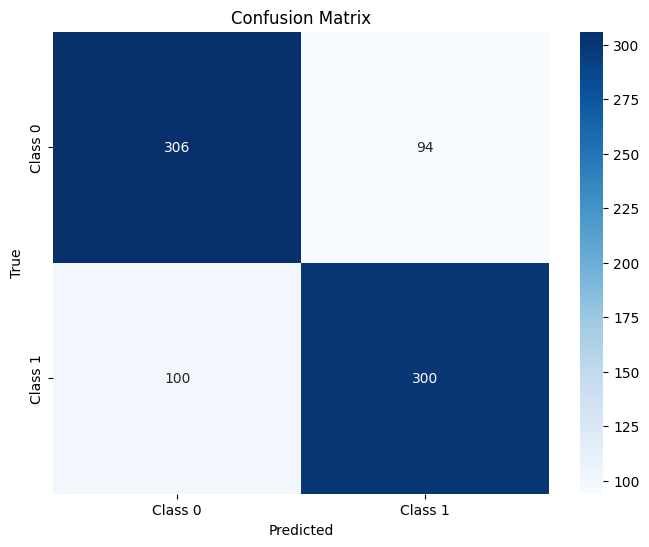

Accuracy: 0.7575
Precision: 0.7536945812807881
Recall: 0.765
F1-Score: 0.7593052109181141


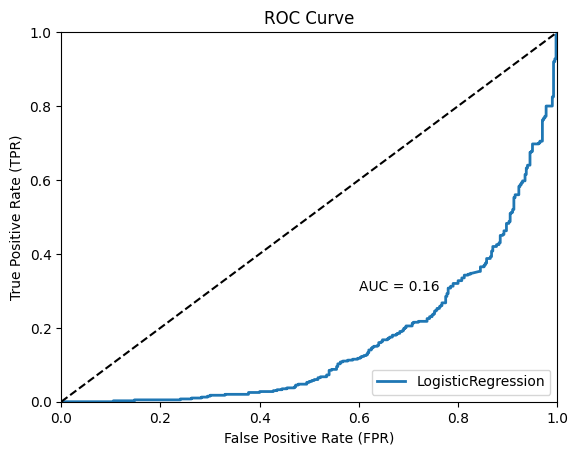

In [10]:
test_data = pd.read_excel("test_final.xlsx")

X_test_tfidf = tfidf_vectorizer.transform(test_data["tokenized_transliteration"])
y_test = test_data["Label"]

y_pred = model.predict(X_test_tfidf)

ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'LogisticRegression')

### Naive Bayes

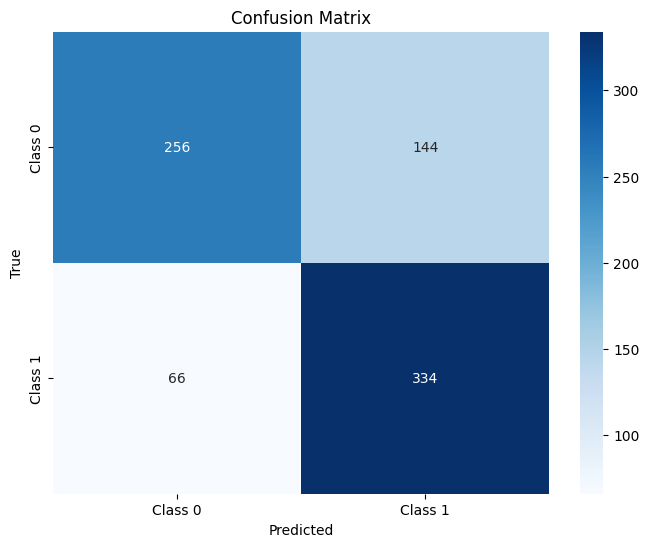

Accuracy: 0.7375
Precision: 0.7950310559006211
Recall: 0.64
F1-Score: 0.7091412742382273


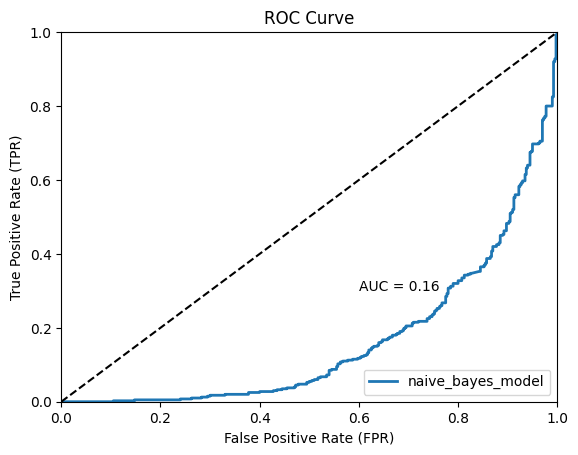

In [12]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

X_test_tfidf = tfidf_vectorizer.transform(test_data["tokenized_transliteration"])
y_test = test_data["Label"]
y_pred = naive_bayes_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'naive_bayes_model')

### SVM

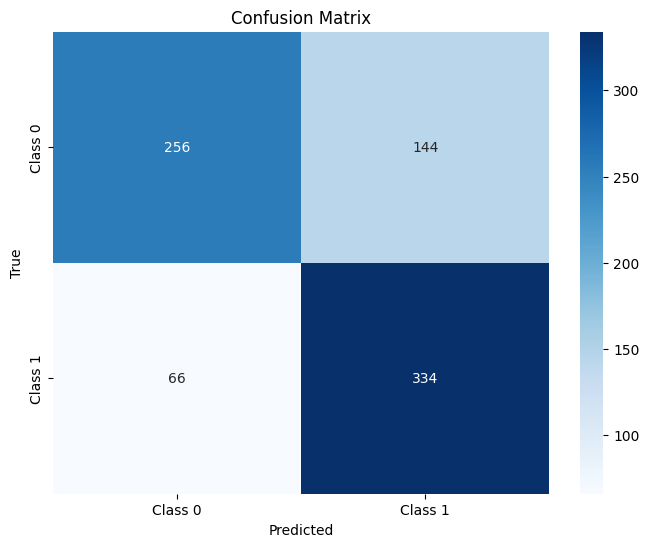

Accuracy: 0.7375
Precision: 0.7950310559006211
Recall: 0.64
F1-Score: 0.7091412742382273


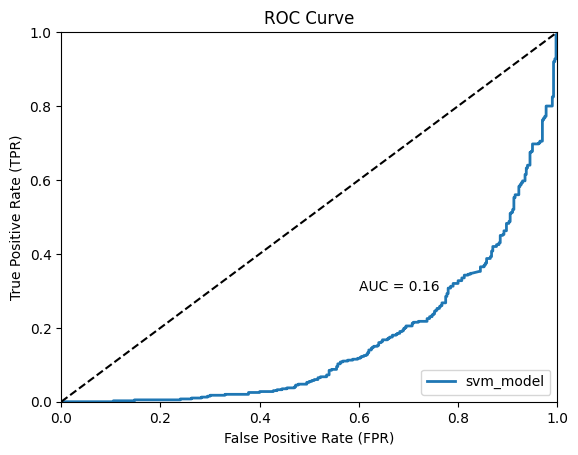

In [13]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Evaluate the SVM model on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'svm_model')


# Pre processing for sequencial DL models


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np


original_train_data = pd.read_excel('/content/train_final.xlsx')
new_test_data = pd.read_excel('/content/test_final.xlsx')


X_train = original_train_data["tokenized_transliteration"]
y_train = original_train_data["Label"]


X_test = new_test_data["tokenized_transliteration"]
y_test = new_test_data["Label"]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

label_to_index = {'non-hate': 0, 'hate': 1}
default_index = len(label_to_index)

y_train_encoded = [label_to_index.get(label, default_index) for label in y_train]
y_test_encoded = [label_to_index.get(label, default_index) for label in y_test]

y_train_encoded = np.array(y_train_encoded).reshape(-1, 1)
y_test_encoded = np.array(y_test_encoded).reshape(-1, 1)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, X_test_padded, y_test, index_to_label):
    y_pred = model.predict(X_test_padded)
    y_pred = (y_pred > 0.5).astype(int)

    y_pred_labels = ['non-hate' if np.all(pred == 0) else 'hate' for pred in y_pred]
    y_test_labels = y_test

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, pos_label='hate')
    recall = recall_score(y_test_labels, y_pred_labels, pos_label='hate')
    f1 = f1_score(y_test_labels, y_pred_labels, pos_label='hate')
    plot_confusion_matrix(y_test_labels,y_pred_labels)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# LSTM

## Single cell

Epoch 1/5
100/100 [==============================] - 23s 110ms/step - loss: 0.6858 - accuracy: 0.5394
Epoch 2/5
100/100 [==============================] - 7s 66ms/step - loss: 0.4469 - accuracy: 0.8371
Epoch 3/5
100/100 [==============================] - 3s 25ms/step - loss: 0.2801 - accuracy: 0.9221
Epoch 4/5
100/100 [==============================] - 2s 21ms/step - loss: 0.1718 - accuracy: 0.9601
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


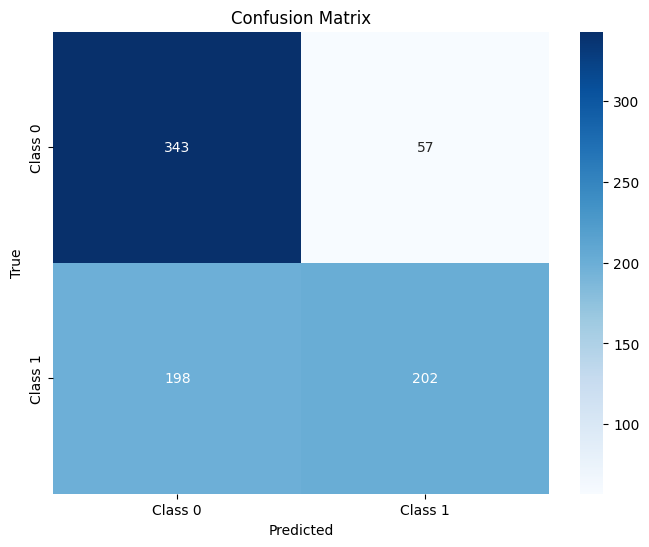

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.68125
Precision: 0.634011090573013
Recall: 0.8575
F1-Score: 0.7290116896918172


In [16]:

import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_lstm.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

evaluation_results = evaluate_model(model_lstm, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [17]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 71, 100)           1169100   
                                                                 
 lstm (LSTM)                 (None, 71, 64)            42240     
                                                                 
 dense (Dense)               (None, 71, 1)             65        
                                                                 
Total params: 1211405 (4.62 MB)
Trainable params: 1211405 (4.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2 layers

In [18]:
model_lstm1 = Sequential()
model_lstm1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm1.add(LSTM(128, return_sequences=True))
model_lstm1.add(LSTM(64, return_sequences=True))
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dense(32, activation='relu'))
model_lstm1.add(Dense(1, activation='sigmoid'))

model_lstm1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model_lstm1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

Epoch 1/5
100/100 [==============================] - 19s 109ms/step - loss: 0.6924 - accuracy: 0.5148
Epoch 2/5
100/100 [==============================] - 4s 39ms/step - loss: 0.5189 - accuracy: 0.7665
Epoch 3/5
100/100 [==============================] - 3s 32ms/step - loss: 0.2744 - accuracy: 0.9225
Epoch 4/5
100/100 [==============================] - 3s 25ms/step - loss: 0.1729 - accuracy: 0.9565
Epoch 5/5
100/100 [==============================] - 2s 16ms/step - loss: 0.1625 - accuracy: 0.9595


25/25 [==============================] - 1s 5ms/step


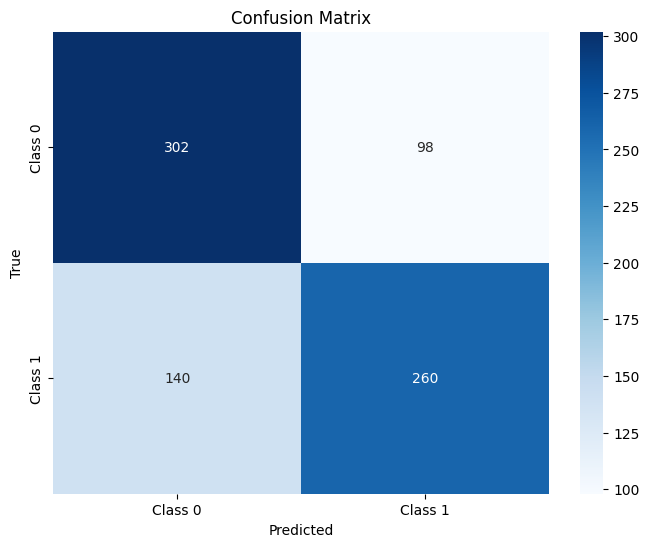

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.7025
Precision: 0.6832579185520362
Recall: 0.755
F1-Score: 0.7173396674584321


In [19]:
evaluation_results = evaluate_model(model_lstm1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
model_lstm1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 71, 100)           1169100   
                                                                 
 lstm_7 (LSTM)               (None, 71, 128)           117248    
                                                                 
 lstm_8 (LSTM)               (None, 71, 64)            49408     
                                                                 
 dense_7 (Dense)             (None, 71, 64)            4160      
                                                                 
 dense_8 (Dense)             (None, 71, 32)            2080      
                                                                 
 dense_9 (Dense)             (None, 71, 1)             33        
                                                                 
Total params: 1342029 (5.12 MB)
Trainable params: 1342

# BI-LSTM

## Single cell

Epoch 1/5
100/100 [==============================] - 12s 80ms/step - loss: 0.6931 - accuracy: 0.5161
Epoch 2/5
100/100 [==============================] - 5s 46ms/step - loss: 0.5301 - accuracy: 0.7790
Epoch 3/5
100/100 [==============================] - 3s 32ms/step - loss: 0.2674 - accuracy: 0.9272
Epoch 4/5
100/100 [==============================] - 2s 17ms/step - loss: 0.1572 - accuracy: 0.9594
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


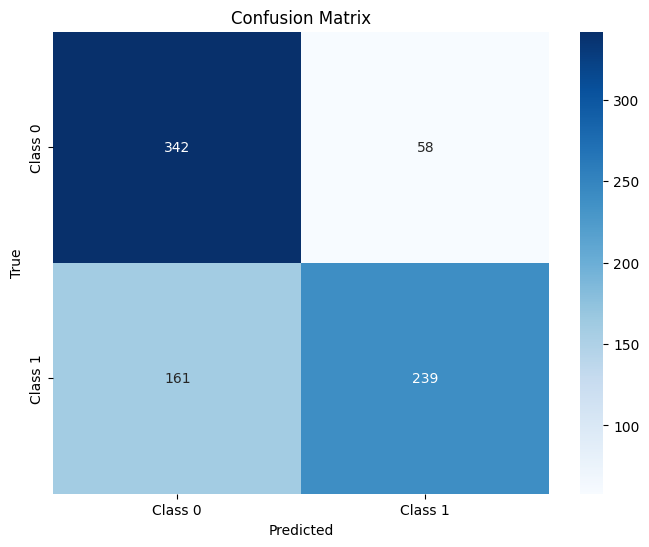

Evaluation Results (BiLSTM 1 cell ):
Accuracy: 0.72625
Precision: 0.679920477137177
Recall: 0.855
F1-Score: 0.7574750830564784


In [20]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(Dense(1, activation='sigmoid'))

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

bilstm_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

evaluation_results = evaluate_model(bilstm_model, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 1 cell ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
bilstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 71, 100)           1169100   
                                                                 
 bidirectional (Bidirection  (None, 71, 128)           84480     
 al)                                                             
                                                                 
 dense_10 (Dense)            (None, 71, 1)             129       
                                                                 
Total params: 1253709 (4.78 MB)
Trainable params: 1253709 (4.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
y_pred = bilstm_model.predict(X_test_padded)
y_pred = (y_pred > 0.5).astype(int)

y_pred_labels = ['non-hate' if np.all(pred == 0) else 'hate' for pred in y_pred]
y_test_labels = y_test

25/25 [==============================] - 0s 6ms/step


In [42]:
test_data['Predictions'] = y_pred_labels

In [44]:
predictions = test_data.drop(["Unnamed: 0.1","Unnamed: 0", "Label","transliterated","tokenized_transliteration"], axis=1)

In [46]:
predictions.to_csv('predictions.csv')

## 2 layers

Epoch 1/5
100/100 [==============================] - 16s 95ms/step - loss: 0.6935 - accuracy: 0.5160
Epoch 2/5
100/100 [==============================] - 4s 41ms/step - loss: 0.6162 - accuracy: 0.6624
Epoch 3/5
100/100 [==============================] - 3s 27ms/step - loss: 0.3601 - accuracy: 0.8703
Epoch 4/5
100/100 [==============================] - 3s 32ms/step - loss: 0.1464 - accuracy: 0.9527
Epoch 5/5
25/25 [==============================] - 1s 10ms/step


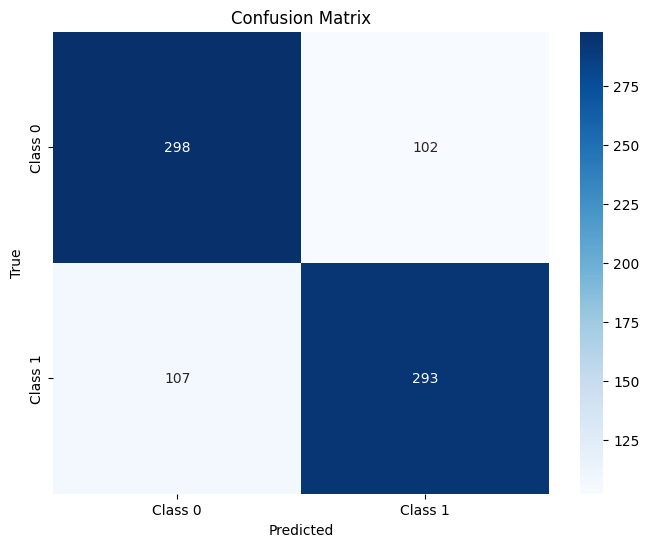

Evaluation Results (BiLSTM 2 cells ):
Accuracy: 0.73875
Precision: 0.7358024691358025
Recall: 0.745
F1-Score: 0.7403726708074535


In [21]:
bilstm_model1 = Sequential()
bilstm_model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model1.add(Bidirectional(LSTM(128, return_sequences=True)))
bilstm_model1.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model1.add(Dense(64, activation='relu'))
bilstm_model1.add(Dense(32, activation='relu'))
bilstm_model1.add(Dense(1, activation='sigmoid'))

bilstm_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

bilstm_model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

evaluation_results = evaluate_model(bilstm_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

#Bi GRU


## Single cell

In [22]:
from tensorflow.keras.layers import GRU

gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
gru_model.add(Bidirectional(GRU(128, return_sequences=True)))
gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
gru_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)



Epoch 1/5
100/100 [==============================] - 15s 89ms/step - loss: 0.7008 - accuracy: 0.5169
Epoch 2/5
100/100 [==============================] - 5s 47ms/step - loss: 0.5810 - accuracy: 0.6669
Epoch 3/5
100/100 [==============================] - 2s 25ms/step - loss: 0.2101 - accuracy: 0.9332
Epoch 4/5
100/100 [==============================] - 4s 36ms/step - loss: 0.1093 - accuracy: 0.9697
Epoch 5/5
100/100 [==============================] - 2s 23ms/step - loss: 0.0554 - accuracy: 0.9857


25/25 [==============================] - 1s 10ms/step


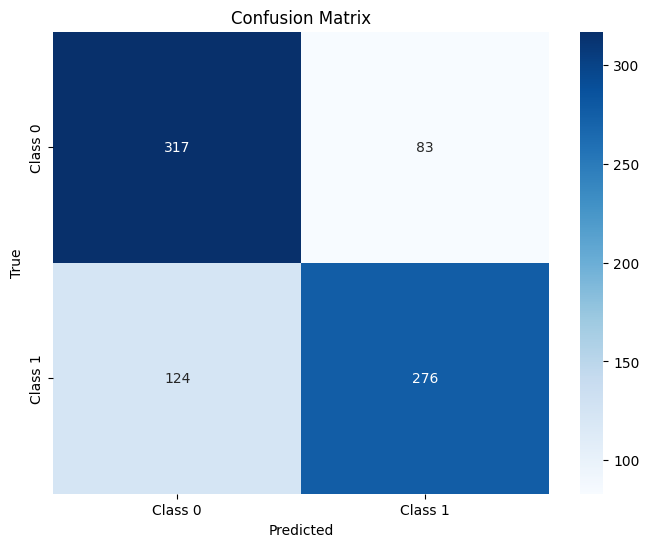

Evaluation Results (BiGRU 2 cells ):
Accuracy: 0.74125
Precision: 0.7188208616780045
Recall: 0.7925
F1-Score: 0.7538644470868014


In [24]:
evaluation_results = evaluate_model(gru_model, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiGRU 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

## 2 layers

Epoch 1/5
100/100 [==============================] - 15s 90ms/step - loss: 0.6920 - accuracy: 0.5177
Epoch 2/5
100/100 [==============================] - 3s 34ms/step - loss: 0.4987 - accuracy: 0.7822
Epoch 3/5
100/100 [==============================] - 4s 36ms/step - loss: 0.1885 - accuracy: 0.9473
Epoch 4/5
100/100 [==============================] - 2s 24ms/step - loss: 0.0845 - accuracy: 0.9785
Epoch 5/5
25/25 [==============================] - 1s 9ms/step


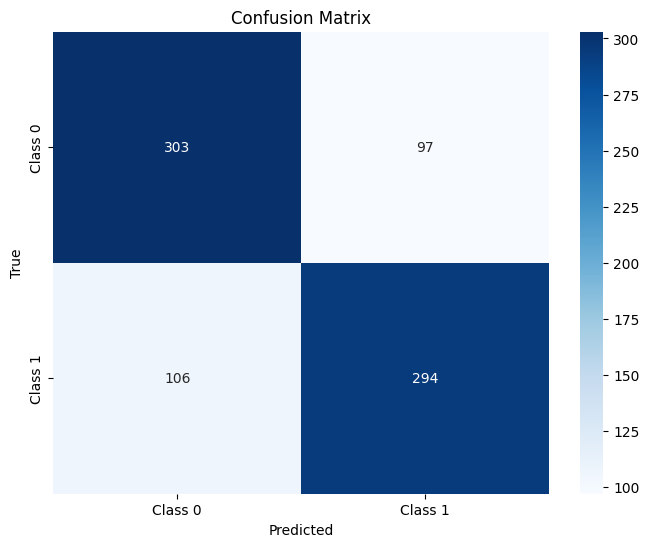

Accuracy on New Test Data Bi Directional GRU : {'accuracy': 0.74625, 'precision': 0.7408312958435208, 'recall': 0.7575, 'f1': 0.7490729295426453}


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
import numpy as np

gru_model1 = Sequential()
gru_model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
gru_model1.add(Bidirectional(GRU(128, return_sequences=True)))
gru_model1.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model1.add(Dense(64, activation='relu'))
gru_model1.add(Dense(32, activation='relu'))
gru_model1.add(Dense(1, activation='sigmoid'))

gru_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gru_model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

accuracy_dl = evaluate_model(gru_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print(f"Accuracy on New Test Data Bi Directional GRU : {accuracy_dl}")

# Stacking method of regular ML Models

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [28]:
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('nb', MultinomialNB())
]

In [29]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [30]:
stacking_classifier.fit(X_train_tfidf, y_train)

y_pred = stacking_classifier.predict(X_test_tfidf)

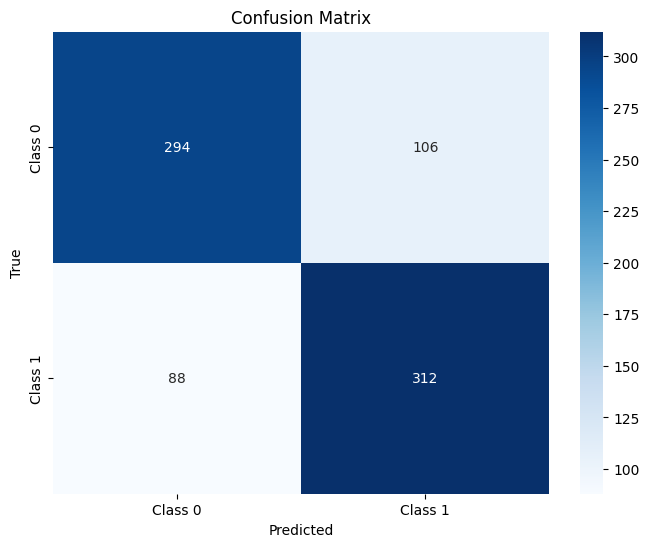

Accuracy: 0.7575
Precision: 0.7696335078534031
Recall: 0.735
F1-Score: 0.751918158567775


In [ ]:
ml_model_eval(y_test,y_pred)

In [31]:
from keras.models import load_model
bilstm_model1.save("bilstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
